# Customer Churn Prediction

---
By: B. Kathir Pandian

## -> Problem Description
- To predict which customers are at high risk of cancelling the subscription to a service, based on their behaviour.

## -> Dataset Description
- The given dataset is about churns that happened for a telecom operator.
- Two separate datasets are available for training and evaluation.
- The train dataset consists of 4250 rows and 20 features (Including the target).
- The test dataset consists of 750 rows and 20 features (Without including the target).

## -> Business Recommendation
- The ability to predict the churn before it actually happens helps the business people to prevent churning of existing customers.
- They can provide support to those customers and prevent the churn.
- They can also identify the reasons of churn and rectify them.

## -> Models Tried
- Logistic Regression
- KNeighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier

## -> Metrics Used
- Accuracy
- Precision
- Recall
- F1-score
- Cross Validated Accuracy

## 1. Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, ConfusionMatrixDisplay

## 2. Getting the data

In [ ]:
# reading the training dataset
train_df = pd.read_csv("Dataset/train.csv")
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
# number of rows and columns in training dataset
train_df.shape

(4250, 20)

In [ ]:
# reading the test dataset
test_df = pd.read_csv("Dataset/test.csv")
test_df.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# number of rows and columns in test dataset
test_df.shape

(750, 20)

In [ ]:
# features in the training dataset
train_df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
# features in the test dataset
test_df.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

## 3. Preprocessing the data

In [ ]:
# getting information about the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
# getting information from the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
# checking for null values in the training dataset
train_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
# checking for null values in the test dataset
test_df.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
# checking the datatypes of training dataset features
train_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [ ]:
# checking the datatypes of test dataset features
test_df.dtypes

id                                 int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [ ]:
# we don't need the id column in the test dataset
test_df.drop("id", axis=1, inplace=True)
test_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [ ]:
# getting the features having object datatype
obj_cols = []
for col_name in train_df.columns:
    if train_df[col_name].dtypes == "O":
        obj_cols.append(col_name)
obj_cols
# the same goes for test dataset as well

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [ ]:
# getting the categorical values and their number of occurrences
train_df["state"].value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [ ]:
train_df["area_code"].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [ ]:
train_df["international_plan"].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [ ]:
train_df["voice_mail_plan"].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

In [ ]:
train_df["churn"].value_counts()
# this column is not present in the test dataset

no     3652
yes     598
Name: churn, dtype: int64

### 3.1. Encoding the Categorical Features

In [ ]:
train_df_enc = train_df.copy()
test_df_enc = test_df.copy()

In [ ]:
train_df_enc.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
test_df_enc.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# encoding the categorical features using LabelEncoder
label_enc = LabelEncoder()

for col in obj_cols:
    train_df_enc[col] = label_enc.fit_transform(train_df_enc[col])
    if col != "churn":
        test_df_enc[col] = label_enc.fit_transform(test_df_enc[col])

In [ ]:
train_df_enc.dtypes
# none of them have datatype - object

state                              int32
account_length                     int64
area_code                          int32
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int32
dtype: object

In [ ]:
test_df_enc.dtypes
# now all the features are numerical in both training and test datasets

state                              int32
account_length                     int64
area_code                          int32
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

### 3.2. Splitting the Train data into Train and Validation sets

In [ ]:
X = train_df_enc.drop("churn", axis=1)
y = train_df_enc["churn"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
len(X_train), len(X_valid)

(3825, 425)

In [ ]:
X_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
596,49,115,2,1,0,0,249.9,95,42.48,242.5,104,20.61,151.7,121,6.83,15.3,6,4.13,1
3725,17,55,1,0,1,37,197.5,89,33.58,228.7,141,19.44,313.4,121,14.10,19.7,2,5.32,1
2596,40,78,1,0,1,21,160.6,85,27.30,223.1,79,18.96,124.0,92,5.58,9.5,1,2.57,2
2765,50,148,0,0,0,0,243.0,115,41.31,191.8,91,16.30,117.8,93,5.30,13.4,5,3.62,2
787,46,126,1,0,0,0,226.2,88,38.45,140.3,114,11.93,208.9,110,9.40,6.4,2,1.73,0


In [ ]:
y_train.head()

596     1
3725    0
2596    0
2765    0
787     0
Name: churn, dtype: int32

In [ ]:
X_valid.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1024,16,36,2,0,0,0,178.6,83,30.36,213.1,103,18.11,198.0,119,8.91,10.9,5,2.94,1
2177,26,16,2,0,0,0,153.2,65,26.04,229.7,90,19.52,148.2,94,6.67,10.7,8,2.89,1
1444,29,99,1,0,0,0,200.0,66,34.00,107.9,104,9.17,233.7,82,10.52,11.4,2,3.08,3
3386,35,159,2,0,0,0,168.5,80,28.65,203.9,119,17.33,199.1,126,8.96,8.1,2,2.19,1
3203,34,77,2,0,0,0,124.1,92,21.10,214.9,131,18.27,241.3,132,10.86,13.7,3,3.70,0


In [ ]:
y_valid.head()

1024    0
2177    0
1444    0
3386    0
3203    0
Name: churn, dtype: int32

In [ ]:
# just taking test_df_enc as X_test for convenience
X_test = test_df_enc

## 4. Visualizing the Data

In [ ]:
X_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
train_df["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [ ]:
train_df_enc["churn"].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [ ]:
train_df["area_code"].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [ ]:
train_df_enc["area_code"].value_counts()

1    2108
0    1086
2    1056
Name: area_code, dtype: int64

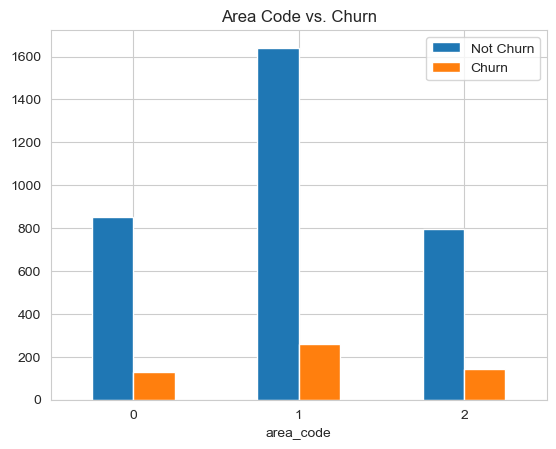

In [ ]:
# plotting area_code against churn
pd.crosstab(X_train["area_code"], y_train).plot.bar()
plt.xticks(rotation=1)
plt.legend(["Not Churn", "Churn"])
plt.title("Area Code vs. Churn");
# 0 - area_code_408
# 1 - area_code_415
# 2 - area_code_510

- From this plot, we can say that the area_code feature may decide the churn.

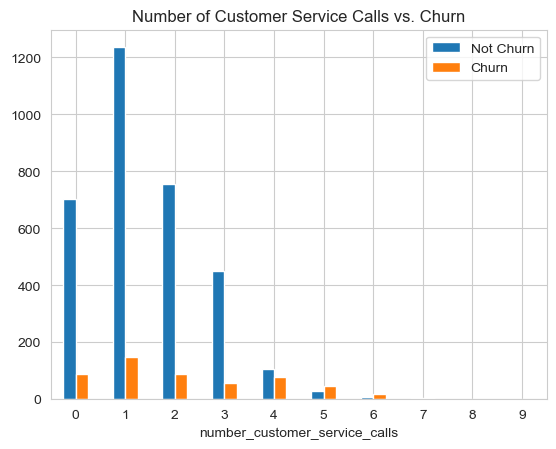

In [ ]:
# plotting number_customer_service_calls against churn
pd.crosstab(X_train["number_customer_service_calls"], y_train).plot.bar()
plt.xticks(rotation=1)
plt.legend(["Not Churn", "Churn"])
plt.title("Number of Customer Service Calls vs. Churn");

- From this plot, we can say that the feature number_customer_service_calls has a very strong influence on target.

In [ ]:
train_df["international_plan"].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

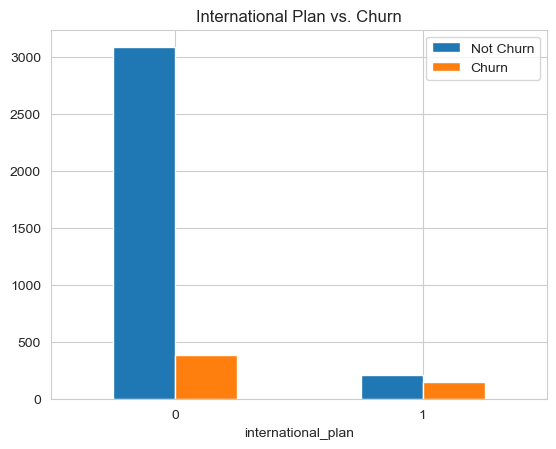

In [ ]:
# plotting international_plan against churn
pd.crosstab(X_train["international_plan"], y_train).plot.bar()
plt.xticks(rotation=1)
plt.legend(["Not Churn", "Churn"])
plt.title("International Plan vs. Churn");

- From this plot, we can say that the feature international_plan may have an influence on target.

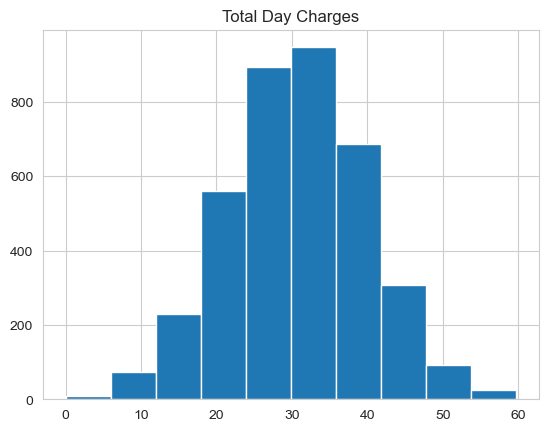

In [ ]:
# a histogram about Total Day charge
plt.hist(X_train["total_day_charge"])
plt.title("Total Day Charges");

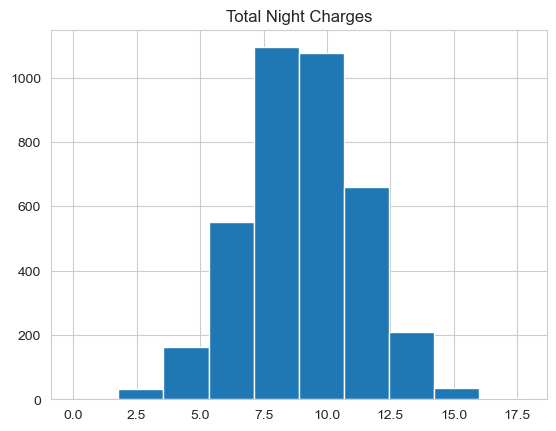

In [ ]:
# a histogram about Total Night charge
plt.hist(X_train["total_night_charge"])
plt.title("Total Night Charges");

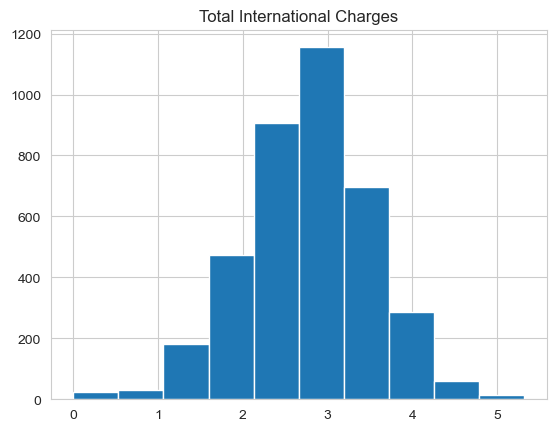

In [ ]:
# a histogram about Total International charge
plt.hist(X_train["total_intl_charge"])
plt.title("Total International Charges");

- The histogram of the Total Day, Night and International Charges is a normal curve.

### 4.1. Correlation Matrix

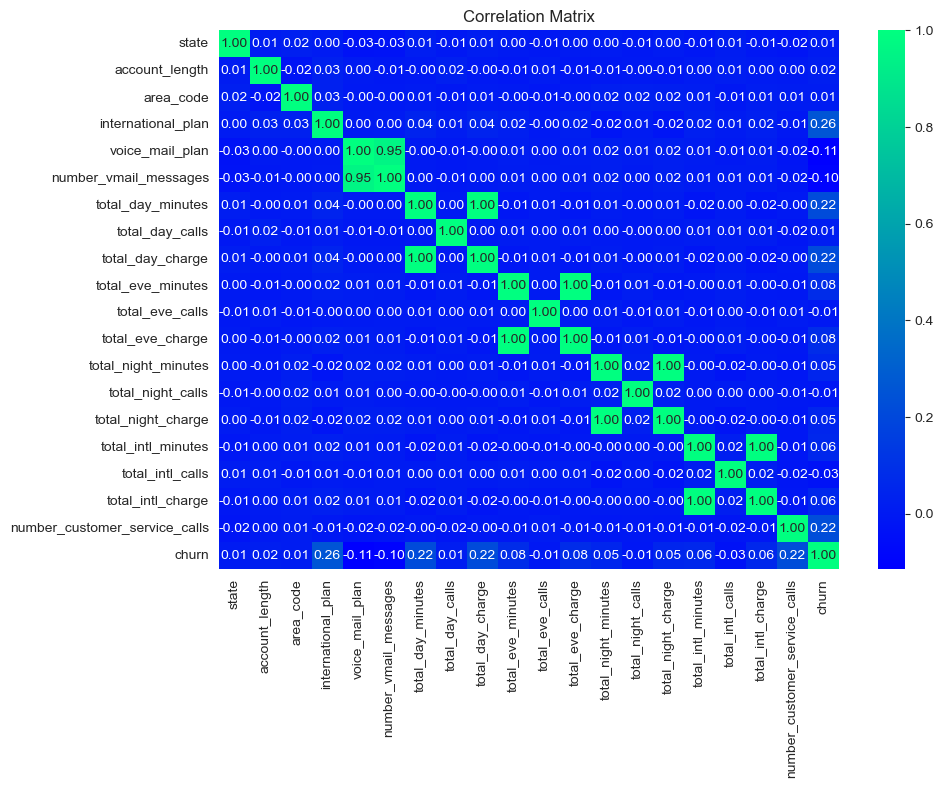

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(train_df_enc.corr(), annot=True, fmt=".2f", cmap="winter")
plt.title("Correlation Matrix");
# represents the relation among the features and target

In [ ]:
# removing some negatively correlated features
rem_list = ["total_eve_calls", "total_night_calls", "total_day_calls"]

In [ ]:
filtered_X_train = X_train.copy()
filtered_X_train.drop(rem_list, axis=1, inplace=True)

In [ ]:
filtered_X_valid = X_valid.copy()
filtered_X_valid.drop(rem_list, axis=1, inplace=True)

In [ ]:
# filtered train and valid data with lesser number of features
filtered_X_train.shape, filtered_X_valid.shape

((3825, 16), (425, 16))

In [ ]:
X_train.shape, X_valid.shape

((3825, 19), (425, 19))

## 5. Creating Models

In [ ]:
# creating a dataframe to store the results
metrics_df = pd.DataFrame(columns=["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier"],
                          index=["accuracy", "precision", "recall", "f1-score", "cross_val_accuracy"])
metrics_df

,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
accuracy,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN
f1-score,NaN,NaN,NaN,NaN
cross_val_accuracy,NaN,NaN,NaN,NaN


In [ ]:
def calculate_results(y_true, y_preds, model, X, y):
    """
    Calculates Accuracy, Mean Absolute error, Mean Squared Error and F1-Score for the predictions
    """
    acc = accuracy_score(y_true, y_preds)
    pre, rec, fs, _ = precision_recall_fscore_support(y_true, y_preds, average="binary")
    crs = np.mean(cross_val_score(model, X, y, cv=5, scoring="accuracy"))
    return {
        "accuracy": acc,
        "precision": pre,
        "recall": rec,
        "f1-score": fs,
        "cross_val_accuracy": crs
    }

In [ ]:
models_list = ["LogisticRegression",
               "KNeighborsClassifier",
               "DecisionTreeClassifier",
               "RandomForestClassifier"]

In [ ]:
all_models = {
    "model_1": LogisticRegression(random_state=42),
    "model_2": KNeighborsClassifier(),
    "model_3": DecisionTreeClassifier(random_state=42),
    "model_4": RandomForestClassifier(random_state=42),
}
# index - to store model's result in metrics_df
index = 0

# fitting all the models one by one and calculating results
for model_name, model in all_models.items():
    model.fit(filtered_X_train, y_train)

    print("Train Data score: ")
    print(f"{model_name}: {model.score(filtered_X_train, y_train):.2f}")

    print("Test Data score:")
    print(f"{model_name}: {model.score(filtered_X_valid, y_valid):.2f}\n")

    y_preds = model.predict(filtered_X_valid)
    metrics_df[models_list[index]] = calculate_results(y_valid, y_preds, model, filtered_X_valid, y_valid)
    index+=1

C:\Users\Kathir\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kathir\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Train Data score: 
model_1: 0.86
Test Data score:
model_1: 0.84

Train Data score: 
model_2: 0.91
Test Data score:
model_2: 0.89

Train Data score: 
model_3: 1.00
Test Data score:
model_3: 0.92

Train Data score: 
model_4: 1.00
Test Data score:
model_4: 0.97



In [ ]:
# results for all the models
metrics_df

,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
accuracy,0.842353,0.887059,0.917647,0.967059
precision,0.333333,0.785714,0.704225,0.903226
recall,0.046875,0.343750,0.781250,0.875000
f1-score,0.082192,0.478261,0.740741,0.888889
cross_val_accuracy,0.849412,0.858824,0.865882,0.896471


- **Selecting RandomForestClassifier for Hyperparameter tuning.**

## 6. Hyperparameter tuning

In [ ]:
rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_model_1.fit(filtered_X_train, y_train)
print(f"Cross Validated Score for RandomForestClassifier with Default parameters:\n{np.mean(cross_val_score(rf_model_1, filtered_X_valid, y_valid, scoring='accuracy', cv=5))}")

Cross Validated Score for RandomForestClassifier with Default parameters:
0.8964705882352941


In [ ]:
param_grid = {
    "n_estimators": np.arange(10, 150, 5),
    "max_features": [5, "sqrt"],
    "min_samples_split": [2, 5],
    "criterion": ["gini", "entropy"]
}

In [ ]:
rf_model_2 = RandomForestClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(rf_model_2, param_grid, scoring="accuracy", n_jobs=-1, cv=5)
grid_search.fit(filtered_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [5, 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145])},
             scoring='accuracy')

In [ ]:
# getting the best hyperparameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 45}

In [ ]:
# getting the best score obtained from GridSearchCV
grid_search.best_score_

0.9581699346405228

In [ ]:
# creating a new model with the obtained parameters
final_model = RandomForestClassifier(
    random_state=42,
    criterion="entropy",
    max_features=5,
    min_samples_split=2,
    n_estimators=45
)

final_model.fit(filtered_X_train, y_train)
final_model.score(filtered_X_valid, y_valid)

0.9576470588235294

In [ ]:
# storing the results of the final model
metrics_df["RandomForestClassifier_Fine_tuned"] = calculate_results(y_valid, final_model.predict(filtered_X_valid), final_model, filtered_X_valid, y_valid)
metrics_df

,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,RandomForestClassifier_Fine_tuned
accuracy,0.842353,0.887059,0.917647,0.967059,0.957647
precision,0.333333,0.785714,0.704225,0.903226,0.883333
recall,0.046875,0.343750,0.781250,0.875000,0.828125
f1-score,0.082192,0.478261,0.740741,0.888889,0.854839
cross_val_accuracy,0.849412,0.858824,0.865882,0.896471,0.896471


In [ ]:
# saving the result
metrics_df.to_csv("All Models Results.csv")

## 7. Prediction on Test data

In [ ]:
X_test.dtypes

state                              int32
account_length                     int64
area_code                          int32
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [ ]:
rem_list

['total_eve_calls', 'total_night_calls', 'total_day_calls']

In [ ]:
filtered_X_test = X_test.copy()
filtered_X_test.drop(rem_list, axis=1, inplace=True)
filtered_X_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,1,0,1,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1
1,1,118,2,1,0,0,223.4,37.98,220.6,18.75,203.9,9.18,6.3,6,1.70,0
2,12,62,1,0,0,0,120.7,20.52,307.2,26.11,203.0,9.14,13.1,6,3.54,4
3,46,93,2,0,0,0,190.7,32.42,218.2,18.55,129.6,5.83,8.1,3,2.19,3
4,29,174,1,0,0,0,124.3,21.13,277.1,23.55,250.7,11.28,15.5,5,4.19,3


In [ ]:
test_preds = final_model.predict(filtered_X_test)

In [ ]:
test_preds[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

## 8. Summary

### 8.1. Confusion Matrix

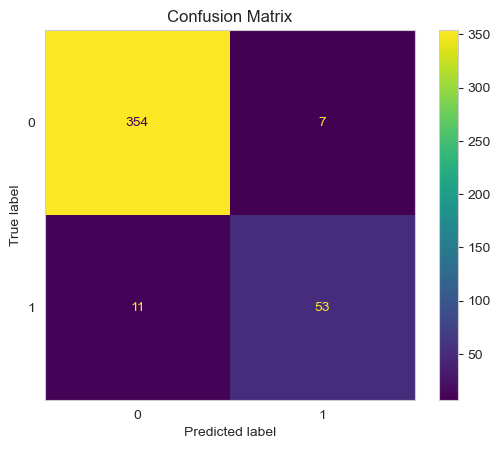

In [ ]:
ConfusionMatrixDisplay.from_estimator(final_model, filtered_X_valid, y_valid, cmap="viridis")
plt.title("Confusion Matrix")
plt.grid(False);

### 8.2. Plotting all models results

In [61]:
# reading the results csv file
mdf = pd.read_csv("All Models Results.csv", index_col=0)
mdf = mdf.T
mdf

,accuracy,precision,recall,f1-score,cross_val_accuracy
LogisticRegression,0.842353,0.333333,0.046875,0.082192,0.849412
KNeighborsClassifier,0.887059,0.785714,0.343750,0.478261,0.858824
DecisionTreeClassifier,0.917647,0.704225,0.781250,0.740741,0.865882
RandomForestClassifier,0.967059,0.903226,0.875000,0.888889,0.896471
RandomForestClassifier_Fine_tuned,0.957647,0.883333,0.828125,0.854839,0.896471


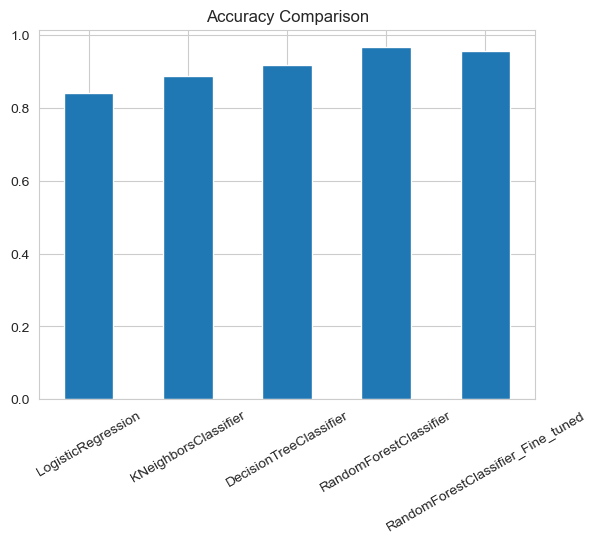

In [62]:
# plotting the accuracy of all the models
mdf["accuracy"].plot.bar()
plt.xticks(rotation=30)
plt.title("Accuracy Comparison");

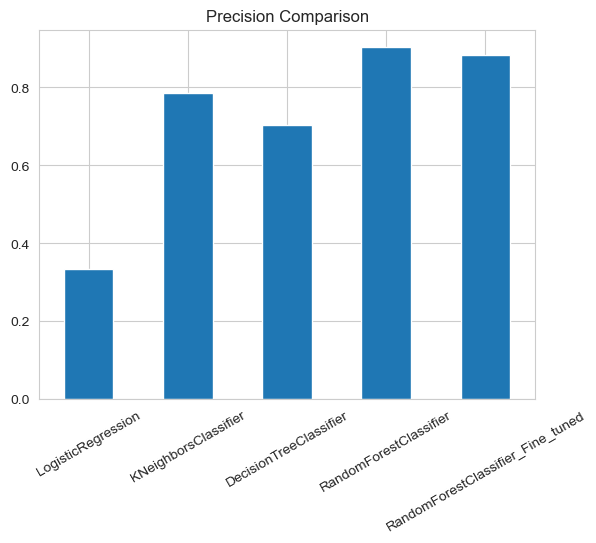

In [63]:
# plotting the precision of all the models
mdf["precision"].plot.bar()
plt.xticks(rotation=30)
plt.title("Precision Comparison");

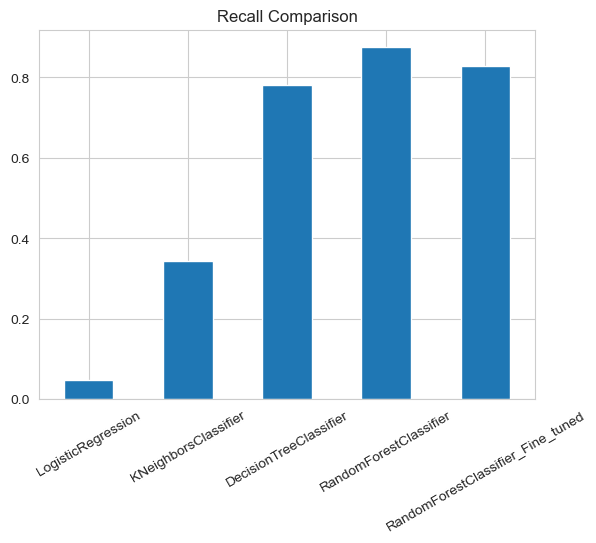

In [64]:
# plotting the recall of all the models
mdf["recall"].plot.bar()
plt.xticks(rotation=30)
plt.title("Recall Comparison");

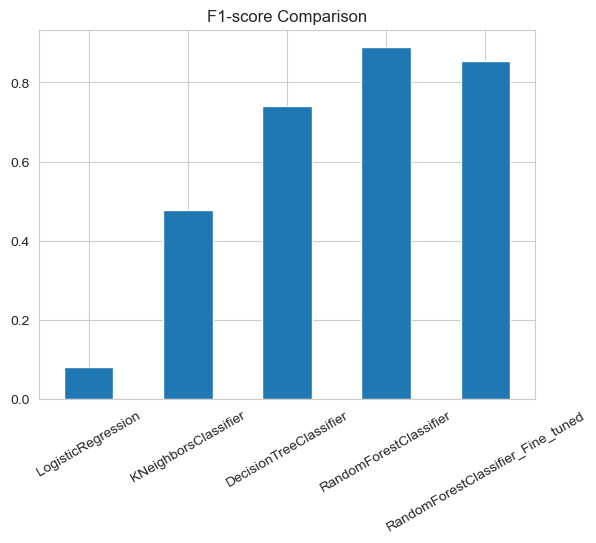

In [65]:
# # plotting the f1-score of all the models
mdf["f1-score"].plot.bar()
plt.xticks(rotation=30)
plt.title("F1-score Comparison");

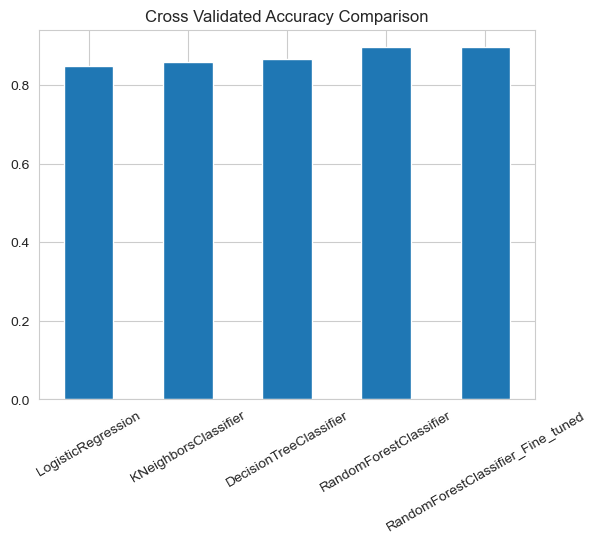

In [66]:
# # plotting the cross validated accuracy of all the models
mdf["cross_val_accuracy"].plot.bar()
plt.xticks(rotation=30)
plt.title("Cross Validated Accuracy Comparison");

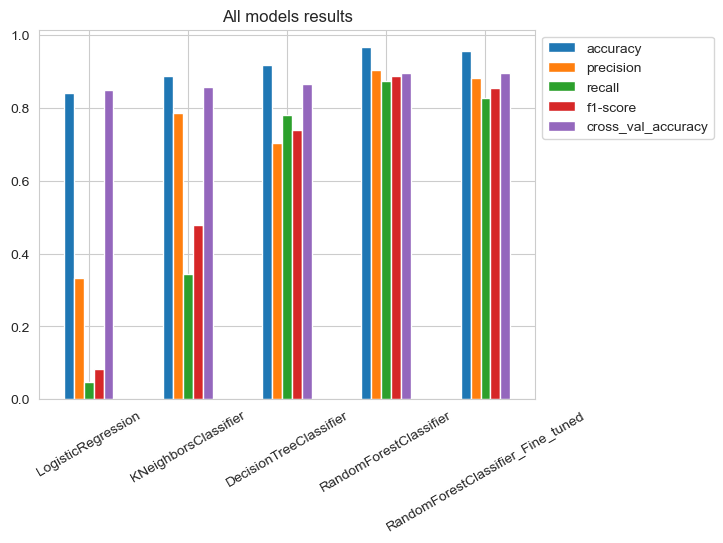

In [ ]:
mdf.plot.bar()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("All models results")
plt.xticks(rotation=30);

In [538]:
%%time
# measuring the time taken for prediction
rf_model_1.predict(filtered_X_test)[:5]

Wall time: 34 ms


array([0, 0, 1, 0, 0])

In [539]:
%%time
final_model.predict(filtered_X_test)[:5]
# takes less time to predict

Wall time: 12.9 ms


array([0, 0, 1, 0, 0])

- The RandomForestClassifier_Fine_Tuned performed better than all the models.
- The RandomForestClassifier with default parameters may be performed better in some scenarios, but it uses more estimators when compared to the Fine-tuned model.
- **Considering the time taken for prediction, and it's Cross_validated_accuracy it is safe to say that the Random Forest Fine-tuned model is better.**